<a href="https://colab.research.google.com/github/puff-tw/1017/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cabin 房間號碼，位置在船的前中後
# https://zh.wikipedia.org/wiki/%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E6%B2%89%E6%B2%92%E4%BA%8B%E6%95%85#/media/File:Titanic_side_plan_annotated_zh.png
# https://www.kaggle.com/competitions/titanic/data

from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/tibaml1017/raw/main/titanic/train.csv"
urlretrieve(url, "train.csv")
url = "https://github.com/Elwing-Chou/tibaml1017/raw/main/titanic/test.csv"
urlretrieve(url, "test.csv")

('test.csv', <http.client.HTTPMessage at 0x7f85b61e3dd0>)

In [2]:
import pandas as pd
datas = pd.read_csv("train.csv", encoding="utf-8")
predicts = pd.read_csv("test.csv", encoding="utf-8")

In [3]:
predicts

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
# axis 要連接的軸。 直的 橫的 {0/'index', 1/'columns'}，默認 0
combine = pd.concat([datas, predicts], axis=0, ignore_index=True)
combine = combine.drop(["PassengerId", "Survived"], axis=1)
combine


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
def change(c):
    if pd.isna(c):
        return c
    else:
        return c[0]
combine["Cabin"] = combine["Cabin"].apply(change)

In [6]:
# n = "Braund, Mr. Owen Harris"
# n.split(".")[0].split(",")[-1].strip()
def change(n):
    if pd.isna(n):
        return n
    else:
        return n.split(".")[0].split(",")[-1].strip()
combine["Name"] = combine["Name"].apply(change)


In [7]:
count = combine["Ticket"].value_counts()
def change(t):
    if pd.isna(t):
        return t
    else:
        return count[t]
combine["Ticket"] = combine["Ticket"].apply(change)


In [8]:
combine

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,Mr,male,22.0,1,0,1,7.2500,NaN,S
1,1,Mrs,female,38.0,1,0,2,71.2833,C,C
2,3,Miss,female,26.0,0,0,1,7.9250,NaN,S
3,1,Mrs,female,35.0,1,0,2,53.1000,C,S
4,3,Mr,male,35.0,0,0,1,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,Mr,male,NaN,0,0,1,8.0500,NaN,S
1305,1,Dona,female,39.0,0,0,3,108.9000,C,C
1306,3,Mr,male,38.5,0,0,1,7.2500,NaN,S
1307,3,Mr,male,NaN,0,0,1,8.0500,NaN,S


In [9]:
pd.DataFrame([
    [1, 2],
    [3, 4],
    [5, 6]
])[[True, False, True]]
pd.Series([1, 2, 3])[[True, False, True]]

# Pandas的操作 apply 和 filter 一定要會

0    1
2    3
dtype: int64

In [10]:
# isna 沒值 True 有值 False
# Pandas的篩選操作
# DataFrame/Series[帶入跟你資料筆數一樣多的True/False]
# combine.isna().sum()
s = combine.isna().sum()
# s > 0
# s[s > 0]
# ascending=False 降序
s[s > 0].sort_values(ascending=False)


Cabin       1014
Age          263
Embarked       2
Fare           1
dtype: int64

In [11]:
# 平均   : 1 2 3 4 -> 2.5
# 中位數 : 1 2 3 4 -> 3
# 左偏 平均 中位數 : 偏度 < 0
# 常態 剛好在中間  : 偏度 = 0
# 右偏 中位數 平均 : 偏度 > 0
# skew 偏度

# 不能有空的值: 補一個最有可能的值
# 類別值(固定數種): Embarked, Pclass, Name(中間), Sex, Cabin, Embarked
# 最常出現的值
# 數值(無限多可能): Age, SibSp, Parch, Ticket, Fare
# 中間值(中位數)

# 1. 補類別值 補最常出現的值
# combine["Embarked"].value_counts()
# combine["Embarked"].value_counts().max()
# idxmax() 取最大的值的 index
mostidx = combine["Embarked"].value_counts().idxmax()
combine["Embarked"] = combine["Embarked"].fillna(mostidx)

In [12]:
# 2. 補數值
# Pclass (倉等)  1等倉/2等倉/3等倉 它不應該是數值，誤填為中位數
med = combine.median().drop("Pclass")
combine = combine.fillna(med)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# 由大補小，輸到csv上面，把填了什麼值，依訓練資料來補
s = combine.isna().sum()
s[s > 0].sort_values(ascending=False)


Cabin    1014
dtype: int64

In [14]:
# data leakage https://zhuanlan.zhihu.com/p/24357137
# https://axk51013.medium.com/%E4%B8%8D%E8%A6%81%E5%86%8D%E5%81%9Aone-hot-encoding-b5126d3f8a63

# Step2. 對類別做One-Hot Encoding
# 做一定沒問題, 我可不可以偷懶
# Pclass: 有大小關係的類別!!! 補:最常  One-Hot Encdoing:可作可不做, 你要不要做要試過才知道: 做其實比較好
# Sex: 可不做, male->0 female->1 二值

In [15]:
combine["Name"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Name, dtype: int64

In [16]:
# Name你可以直接做one-hot沒有問題, 但我為了美觀, 把太稀少的去掉
c = combine["Name"].value_counts()
whitelist = c[c > 50].index
def change(n):
    if n in whitelist:
        return n
    else:
        return None
combine["Name"] = combine["Name"].apply(change)


In [17]:
pd.set_option('display.max_columns', 500)
combine = pd.get_dummies(combine)
combine = pd.get_dummies(combine, columns=["Pclass"])
combine


,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [18]:
combine["Family"] = combine["SibSp"] + combine["Parch"]
combine


,Age,SibSp,Parch,Ticket,Fare,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Family
0,22.0,1,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,38.0,1,0,2,71.2833,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
2,26.0,0,0,1,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,35.0,1,0,2,53.1000,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1
4,35.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1305,39.0,0,0,3,108.9000,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1306,38.5,0,0,1,7.2500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1307,28.0,0,0,1,8.0500,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [19]:
# 拿列: loc(用index)/iloc(用實際的第幾筆)
# iloc: [row1, row2, row3]
d = pd.DataFrame([
    [1, 2],
    [3, 4]
], index=[3, 0])
d.loc[0]


0    3
1    4
Name: 0, dtype: int64

In [20]:
# 分開, 準備開始建立模型
import numpy as np
x = combine.iloc[:len(datas)]
x = np.array(x)
y = datas["Survived"]
y = np.array(y)
x_predict = combine.iloc[len(datas):]
x_predict = np.array(x_predict)

In [34]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# 跑迴圈
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
params = {
    "max_depth": range(3, 15)
}
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x, y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(3, 15)})

In [37]:
print(search.best_score_) # 平均分數
print(search.best_params_) # 哪一組參數能達到最好分數

0.8282896379525594
{'max_depth': 4}


In [31]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
# n_jobs 分成幾份做平行運算 六核心分成六份 -1 有多少用多少

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4)
scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
print("10 scores:", scores)
print("average:", np.average(scores))


10 scores: [0.83333333 0.87640449 0.76404494 0.85393258 0.84269663 0.78651685
 0.85393258 0.7752809  0.85393258 0.85393258]
average: 0.8294007490636706


In [39]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x, y)
pre = clf.predict(x_predict)
result = pd.DataFrame({
    "PassengerId":predicts["PassengerId"],
    "Survived":pre
})
result.to_csv("dt.csv", encoding="utf-8", index=False)
result


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [40]:
# 觀點不同的分類器，控制觀點不應該是演算法，能讓你看法不同的是經驗不一樣，成長經歷不一樣 (資料不同)
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
params = {
    "max_depth": range(3, 15), # 會很久，所以老師調成 3, 10 
    "n_estimators": range(11, 150, 2),
}

search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x, y)
print(search.best_score_) # 平均分數
print(search.best_params_) # 哪一組參數能達到最好分數

0.845131086142322
{'max_depth': 7, 'n_estimators': 83}


In [41]:
clf = search.best_estimator_
pre = clf.predict(x_predict)
result = pd.DataFrame({
    "PassengerId":predicts["PassengerId"],
    "Survived":pre
})
result.to_csv("rf.csv", encoding="utf-8", index=False)
result


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


[Text(0.5, 0.875, 'Sex_male <= 0.5\ngini = 0.487\nsamples = 567\nvalue = [517, 374]\nclass = Dead'),
 Text(0.25, 0.625, 'Pclass_3 <= 0.5\ngini = 0.354\nsamples = 208\nvalue = [78, 261]\nclass = Survived'),
 Text(0.125, 0.375, 'Ticket <= 2.5\ngini = 0.08\nsamples = 114\nvalue = [8, 184]\nclass = Survived'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Fare <= 20.8\ngini = 0.499\nsamples = 94\nvalue = [70, 77]\nclass = Survived'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Name_Mr <= 0.5\ngini = 0.326\nsamples = 359\nvalue = [439, 113]\nclass = Dead'),
 Text(0.625, 0.375, 'Embarked_Q <= 0.5\ngini = 0.498\nsamples = 29\nvalue = [23, 26]\nclass = Survived'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Embarked_C <= 0.5\ngini = 0.286\nsamples = 330\nvalue = [416, 87]\nclass = Dead'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0

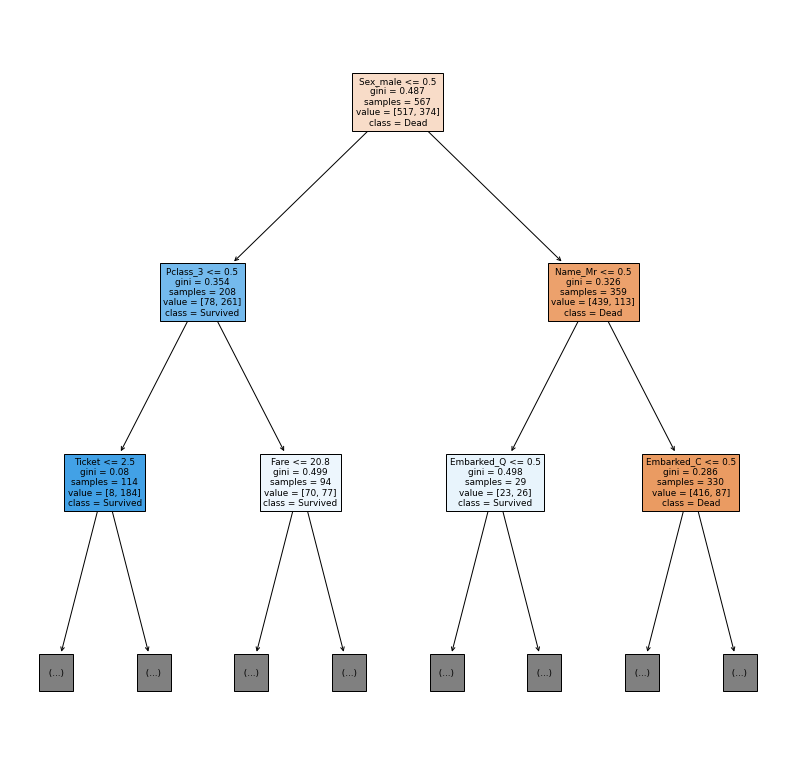

In [42]:
# 如果你想知道rf的某一個決策樹的樣子
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
plot_tree(clf.estimators_[0], 
     feature_names=combine.columns, 
     filled=True,
     max_depth=2,
     class_names=["Dead", "Survived"])


In [43]:
# feature_importance
imp = pd.DataFrame({
    "imp":clf.feature_importances_
}, index=combine.columns)
imp.sort_values(by="imp", ascending=False)
# 存活與否最相關的東西

,imp
Name_Mr,0.157399
Sex_female,0.133426
Sex_male,0.113005
Fare,0.099518
Age,0.074658
Pclass_3,0.067330
Ticket,0.054988
Name_Miss,0.049151
Family,0.042541
Name_Mrs,0.037390


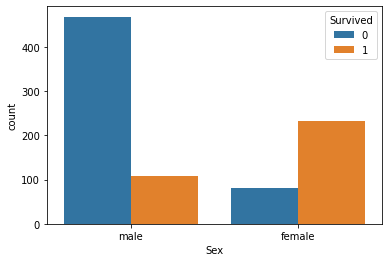

In [44]:
# https://seaborn.pydata.org/generated/seaborn.countplot.html

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=datas["Sex"], hue=datas["Survived"])


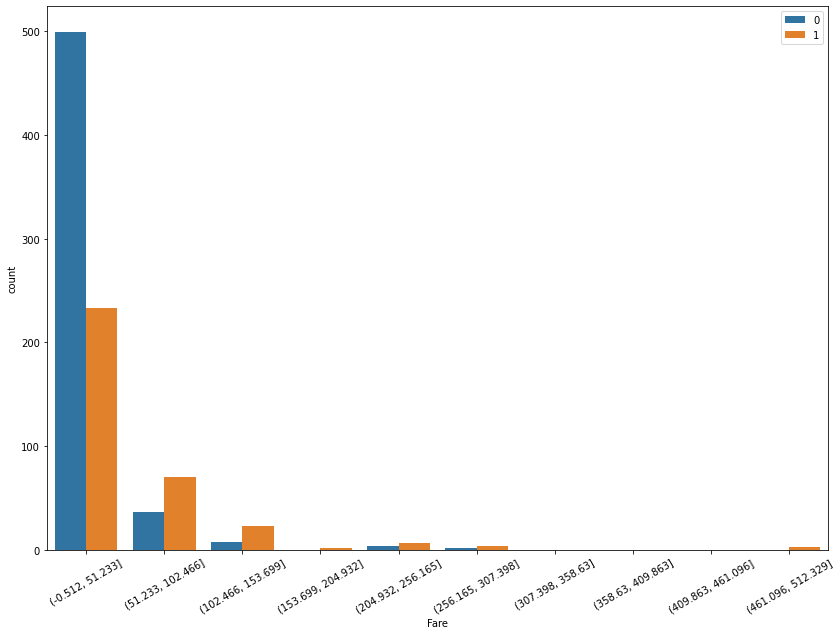

In [45]:
plt.figure(figsize=(14, 10))
c = pd.cut(datas["Fare"], 10)
sns.countplot(x=c, hue=datas["Survived"])
plt.xticks(rotation=30)
plt.legend(loc="upper right")


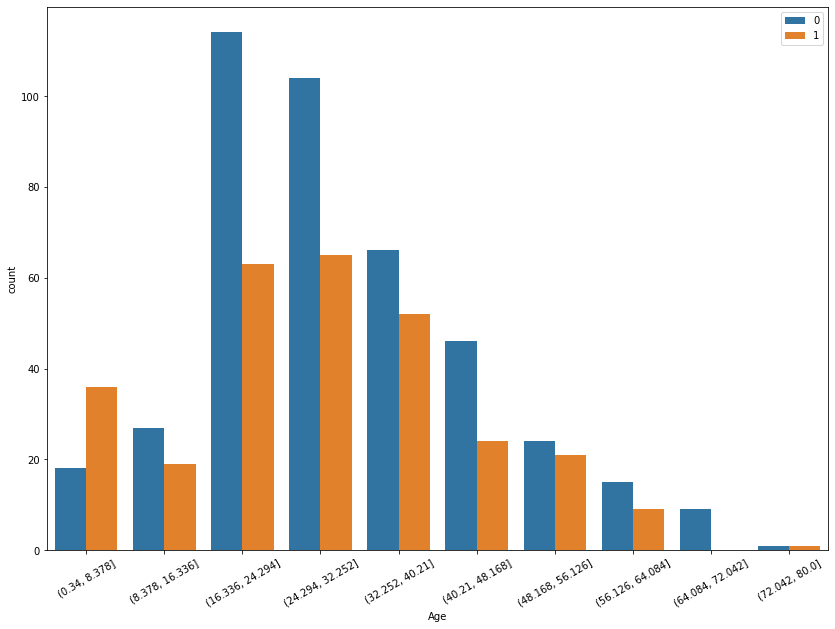

In [46]:
plt.figure(figsize=(14, 10))
c = pd.cut(datas["Age"], 10)
sns.countplot(x=c, hue=datas["Survived"])
plt.xticks(rotation=30)
plt.legend(loc="upper right")


In [47]:
# 用 KNN 之前要用 scaling 換成數字，和距離有關，以前有個演算法 kmeans 也應該要做 scaling
# 第二個問題：樹不用做。

In [48]:
# fit 找區勢  transform 轉化
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
combine_scale = scaler.fit_transform(combine)
combine_scale = pd.DataFrame(combine_scale)
combine_scale

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.273456,0.125,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.1
1,0.473882,0.125,0.000000,0.1,0.139136,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.1
2,0.323563,0.000,0.000000,0.0,0.015469,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.436302,0.125,0.000000,0.1,0.103644,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.1
4,0.436302,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1305,0.486409,0.000,0.000000,0.2,0.212559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1306,0.480145,0.000,0.000000,0.0,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1307,0.348616,0.000,0.000000,0.0,0.015713,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [49]:
x_scale = combine_scale.iloc[:len(datas)]
x_scale = np.array(x_scale)
y_scale = datas["Survived"]
y_scale = np.array(y_scale)
x_predict_scale = combine_scale.iloc[len(datas):]
x_predict_scale = np.array(x_predict_scale)


In [50]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
params = {
    "n_neighbors":range(2, 100)
}
search = GridSearchCV(clf, params, cv=10, n_jobs=-1)
search.fit(x_scale, y)
print(search.best_score_)
print(search.best_params_)


0.832796504369538
{'n_neighbors': 7}


In [51]:
# 平常我就是7, 但我現在靠點運氣
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(x_scale, y)
pre = clf.predict(x_predict_scale)
result = pd.DataFrame({
    "PassengerId":predicts["PassengerId"],
    "Survived":pre
})
result.to_csv("knn.csv", encoding="utf-8", index=False)
result

# 老師 ML和DL可以結合做ensemble learning嗎

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
